#Fine tune a diffuser using DreamBooth
The finetuning has an objective of teaching the diffuser to recognize a moroccan cookie called Chebakia. (see photo below)

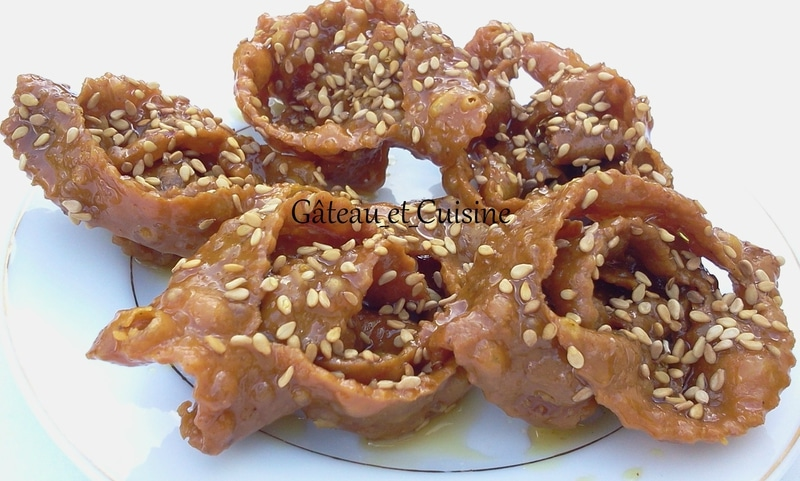

Using 4-6 images of "Chebakia" we show that Dreambooth enable the finetuning of a diffusion model.
In this notebook, a controlnet model will be associated to the difuser to do inferences.

##Call the libraries

In [ ]:
!git clone https://github.com/huggingface/diffusers



Cloning into 'diffusers'...
remote: Enumerating objects: 21463, done.
remote: Counting objects: 100% (437/437), done.
remote: Compressing objects: 100% (260/260), done.
remote: Total 21463 (delta 266), reused 280 (delta 151), pack-reused 21026
Receiving objects: 100% (21463/21463), 13.96 MiB | 27.22 MiB/s, done.
Resolving deltas: 100% (15207/15207), done.


In [ ]:
!pip install git+https://github.com/huggingface/diffusers
!pip install -U -r diffusers/examples/dreambooth/requirements.txt

In [ ]:
from accelerate.utils import write_basic_config
write_basic_config()

PosixPath('/root/.cache/huggingface/accelerate/default_config.yaml')

In [ ]:
!pip install xformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 MB 13.1 MB/s eta 0:00:00


In [ ]:
!pip install bitsandbytes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.3/76.3 MB 11.1 MB/s eta 0:00:00


##Launch fine tuning
in the code below, we are not using measures to avoid overfitting, it will come in another version of this notebook.

In [ ]:
%%bash
export MODEL_NAME="runwayml/stable-diffusion-v1-5"
export INSTANCE_DIR="/content/drive/MyDrive/Colab_Notebooks/Chebakia"
export OUTPUT_DIR="/content/drive/MyDrive/Colab_Notebooks"

accelerate launch --mixed_precision="fp16" /content/diffusers/examples/dreambooth/train_dreambooth.py \
  --pretrained_model_name_or_path=$MODEL_NAME  \
  --instance_data_dir=$INSTANCE_DIR \
  --output_dir=$OUTPUT_DIR \
  --instance_prompt="a photo of a cookie" \
  --resolution=512 \
  --train_batch_size=1 \
  --learning_rate=5e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=400\
  --checkpointing_steps=500\
  --enable_xformers_memory_efficient_attention\
  --set_grads_to_none \
  --use_8bit_adam \
  --mixed_precision=fp16\
  --gradient_accumulation_steps=2 --gradient_checkpointing


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please submit your error trace to: https://github.com/TimDettmers/bitsandbytes/issues


2023-03-05 16:23:35.788556: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-05 16:23:37.590951: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-05 16:23:37.591586: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-05 16:23:37.591608: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
!ls -lah /content/drive/MyDrive/Colab_Notebooks

total 4.4M
drwx------ 2 root root 4.0K Mar  5 14:06  Chebakia
-rw------- 1 root root 149K Mar  5 16:34  ControlNet_chebakia.ipynb
-rw------- 1 root root 314K Nov 25  2021 'Copie de forecast_to_power.ipynb'
drwx------ 2 root root 4.0K Feb  7 12:31  deepL
-rw------- 1 root root  33K Apr 23  2021  demo_read_data.ipynb
-rw------- 1 root root  353 Mar 11  2022  DialogueRNN.ipynb
-rw------- 1 root root 176K Mar 15  2022  distilbert-base-uncased-emotion.ipynb
drwx------ 2 root root 4.0K Mar  5 16:34  feature_extractor
-rw------- 1 root root 232K Oct 28  2021 'forecast_to_power (1).ipynb'
-rw------- 1 root root 922K Jun 27  2022  forecast_to_power.ipynb
drwx------ 3 root root 4.0K Mar  5 16:12  logs
-rw------- 1 root root 8.2K May 30  2022  ML_to_power.ipynb
-rw------- 1 root root  584 Mar  5 16:34  model_index.json
-rw------- 1 root root 2.3M Aug 11  2022  PrevisionPVRenardieres.ipynb
drwx------ 2 root root 4.0K Mar  5 16:34  safety_checker
drwx------ 2 root root 4.0K Mar  5 16:34  scheduler


##Inference
We try here some examples, probably, the model has been overfitted. But this can be fixed in another version as said.

  0%|          | 0/20 [00:00<?, ?it/s]

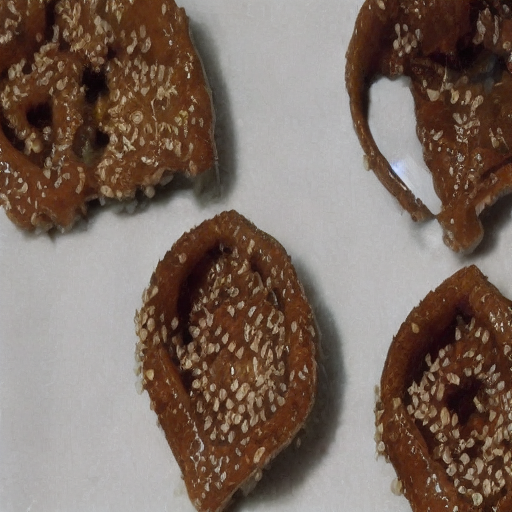

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "/content/drive/MyDrive/Colab_Notebooks/Chebakia/model"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")

prompt = "girl taking a cookie"
image = pipe(prompt, num_inference_steps=20, guidance_scale=2).images[0]

image

##Upload the model to hugging face

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid.
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credential helper as d

In [ ]:
from huggingface_hub import Repository
repo = Repository(local_dir="ay7aja", clone_from="asmaekhald/chebakia-diffusion")

Cloning https://huggingface.co/asmaekhald/chebakia-diffusion into local empty directory.


In [ ]:
!cp -r /content/drive/MyDrive/Colab_Notebooks/Chebakia/model /content/ay7aja

In [ ]:
repo.git_pull(rebase=True)

In [ ]:
repo.push_to_hub("add model")

Upload file model/unet/diffusion_pytorch_model.bin:   0%|          | 32.0k/3.20G [00:00<?, ?B/s]

Upload file model/vae/diffusion_pytorch_model.bin:   0%|          | 32.0k/319M [00:00<?, ?B/s]

Upload file model/logs/dreambooth/1678033281.0256798/events.out.tfevents.1678033281.2ed6d4c9915f.5596.1: 100%|…

Upload file model/logs/dreambooth/events.out.tfevents.1678033447.2ed6d4c9915f.6335.0:  49%|####9     | 32.0k/6…

Upload file model/logs/dreambooth/1678033447.0557222/events.out.tfevents.1678033447.2ed6d4c9915f.6335.1: 100%|…

Upload file model/text_encoder/pytorch_model.bin:   0%|          | 32.0k/235M [00:00<?, ?B/s]

Upload file model/logs/dreambooth/1678032753.431704/events.out.tfevents.1678032753.2ed6d4c9915f.3181.1: 100%|#…

Upload file model/safety_checker/pytorch_model.bin:   0%|          | 32.0k/1.13G [00:00<?, ?B/s]

Upload file model/logs/dreambooth/1678033128.0417457/events.out.tfevents.1678033128.2ed6d4c9915f.4853.1: 100%|…

Upload file model/logs/dreambooth/1678032928.041292/events.out.tfevents.1678032928.2ed6d4c9915f.3985.1: 100%|#…

Upload file model/logs/dreambooth/events.out.tfevents.1678033280.2ed6d4c9915f.5596.0: 100%|##########| 166/166…

Upload file model/logs/dreambooth/events.out.tfevents.1678033127.2ed6d4c9915f.4853.0: 100%|##########| 166/166…

Upload file model/logs/dreambooth/events.out.tfevents.1678032928.2ed6d4c9915f.3985.0: 100%|##########| 88.0/88…

Upload file model/logs/dreambooth/events.out.tfevents.1678032753.2ed6d4c9915f.3181.0: 100%|##########| 88.0/88…

remote: Scanning LFS files of refs/heads/main for validity...        
remote: LFS file scan complete.        
To https://huggingface.co/asmaekhald/chebakia-diffusion
   d104269..de6e2c3  main -> main

remote: LFS file scan complete.        
To https://huggingface.co/asmaekhald/chebakia-diffusion
   d104269..de6e2c3  main -> main



'https://huggingface.co/asmaekhald/chebakia-diffusion/commit/de6e2c3626328454f7be23c10b8d6d551eedf2f6'

##Inference of the diffuser with controlnet
Trying with this finetuned model + ControlNet

In [ ]:
!pip install -q opencv-contrib-python
!pip install -q controlnet_aux

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 4.7 MB/s eta 0:00:00


In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import torch

controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)

Error caught was: No module named 'triton'


In [ ]:
from diffusers import UniPCMultistepScheduler

In [ ]:
!pip install -q diffusers==0.14.0 transformers xformers git+https://github.com/huggingface/accelerate.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 KB 12.7 MB/s eta 0:00:00


In [ ]:
#model_id = "sd-dreambooth-library/mr-potato-head"
model_id = "/content/drive/MyDrive/Colab_Notebooks/Chebakia/model"
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    model_id,
    controlnet=controlnet,
    torch_dtype=torch.float16,
)
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()
pipe.enable_xformers_memory_efficient_attention()

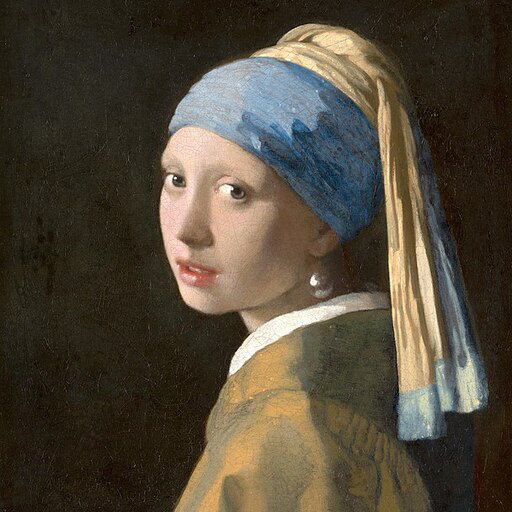

In [ ]:
from diffusers.utils import load_image

image = load_image(
    "https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png"
)
image


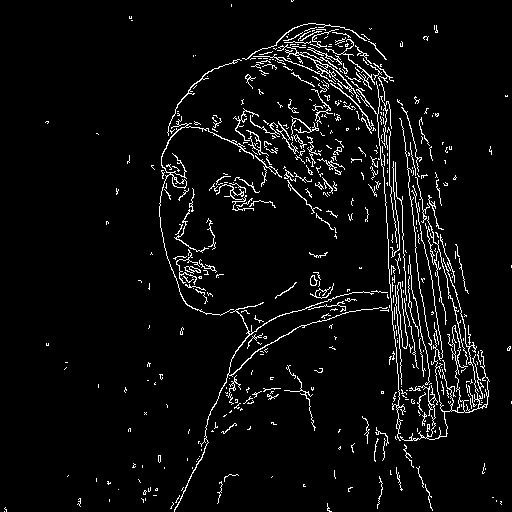

In [ ]:
import cv2
from PIL import Image
import numpy as np

image = np.array(image)

low_threshold = 100
high_threshold = 200

image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)
canny_image


In [ ]:
generator = torch.manual_seed(2)
prompt = "a photo of cookie, best quality, extremely detailed"
output = pipe(
    prompt,
    canny_image,
    negative_prompt="monochrome, lowres, bad anatomy, worst quality, low quality",
    generator=generator,
    num_inference_steps=10,
)

  0%|          | 0/10 [00:00<?, ?it/s]

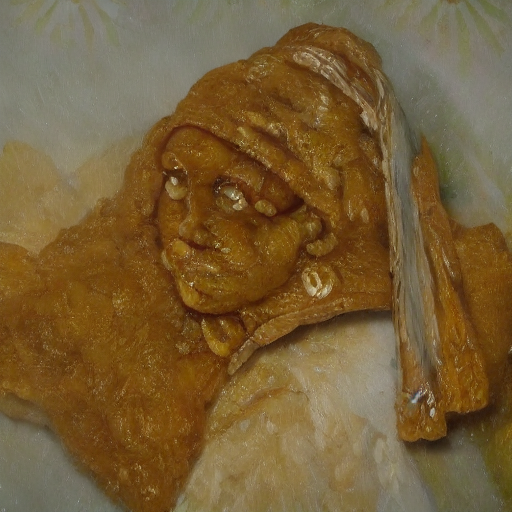

In [ ]:
output.images[0]